In [1]:
def replicate(img):
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    img = np.vstack((img,img))
    return img

In [2]:
import numpy as np
one_hot_r = [0.5, 0, 0, 0]
one_hot_g = [0, -1, 0, 0]
one_hot_b = [0, 0, 0.25, 0]
one_hot_y = [0, 0, 0, 0.5]
classes = ['red', 'green', 'blue', 'yellow']

img = np.full((4, 3, 64, 64),-0.9)
for k, c in enumerate(classes):

    for i in range(64):
        for j in range(64):
            if k == 0:
                img[k, 0, i, j] = 0.9
            elif k == 1:
                img[k, 1, i, j] = 0.9
            elif k == 2:
                img[k, 2, i, j] = 0.9
            elif k == 3:
                img[k, 0, i, j] = 0.9
                img[k, 1, i, j] = 0.9

text = ["red","green","blue","yellow"]
class_ = [1,2,3,4]
embeddings = [[1,0,0,0]+[0]*1020,
              [0,1,0,0]+[0]*1020,
              [0,0,1,0]+[0]*1020,
              [0,0,0,1]+[0]*1020]

img = replicate(img)
text = replicate(text).flatten()
class_ = replicate(class_).flatten()
embeddings = replicate(embeddings)

In [3]:
print(img.shape)
print(embeddings.shape)
print(text.shape)
print(class_.shape)

(512, 3, 64, 64)
(512, 1024)
(512,)
(512,)


In [14]:
print(img[0])

[[[ 0.9  0.9  0.9 ...  0.9  0.9  0.9]
  [ 0.9  0.9  0.9 ...  0.9  0.9  0.9]
  [ 0.9  0.9  0.9 ...  0.9  0.9  0.9]
  ...
  [ 0.9  0.9  0.9 ...  0.9  0.9  0.9]
  [ 0.9  0.9  0.9 ...  0.9  0.9  0.9]
  [ 0.9  0.9  0.9 ...  0.9  0.9  0.9]]

 [[-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  ...
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]]

 [[-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  ...
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]
  [-0.9 -0.9 -0.9 ... -0.9 -0.9 -0.9]]]


In [4]:
print(class_.shape, text.shape,embeddings.shape,img.shape)

(512,) (512,) (512, 1024) (512, 3, 64, 64)


In [5]:
%matplotlib inline

In [6]:
img.shape

(512, 3, 64, 64)

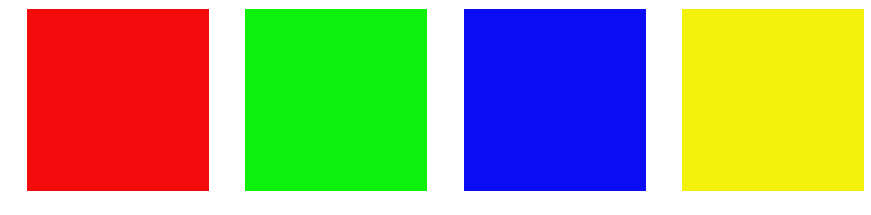

In [7]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 4, figsize=(15, 15)) # Grid size of 10X10 and a fig size
f.subplots_adjust()
for i, image in enumerate(img[0:4]):
    axarr[i].imshow(np.swapaxes(np.swapaxes((image+1)/2,0,1),1,2))
    axarr[i].axis('off')

In [8]:
import os
from os.path import join, isfile
import numpy as np
import h5py
from glob import glob
# from torch.utils.serialization import load_lua
from PIL import Image
import yaml
import io
import pdb

In [9]:
# with open('config.yaml', 'r') as f:
# 	config = yaml.load(f)
datasetDir = '/scratch/cluster-share/linzhe/text2image/flowersV8.hdf5'

f = h5py.File(datasetDir, 'w')
train = f.create_group('train')
valid = f.create_group('valid')
test = f.create_group('test')

# for _class in sorted(os.listdir(embedding_path)):
# 	split = ''
# 	if _class in train_classes:
# 		split = train
# 	elif _class in val_classes:
# 		split = valid
# 	elif _class in test_classes:
# 		split = test

In [10]:
print(text[1])

green


In [11]:

# img = []

dt = h5py.special_dtype(vlen=str)
split = train

for c, e in enumerate(embeddings):
    ex = split.create_group('colors_'+str(c))
    ex.create_dataset('name', data="colors")
    ex.create_dataset('img', data=np.array(img[c]))
    ex.create_dataset('embeddings', data=e)
    ex.create_dataset('class', data=class_[c])
    ex.create_dataset('txt', data=str(text[c]), dtype=dt)
# f.close()


In [12]:
dt = h5py.special_dtype(vlen=str)
split = test

for c, e in enumerate(embeddings):
    ex = split.create_group('colors_'+str(c))
    ex.create_dataset('name', data="colors")
    ex.create_dataset('img', data=np.array(img[c]))
    ex.create_dataset('embeddings', data=e)
    ex.create_dataset('class', data=class_[c])
    ex.create_dataset('txt', data=str(text[c]), dtype=dt)
# f.close()

In [13]:
dt = h5py.special_dtype(vlen=str)
split = valid

for c, e in enumerate(embeddings):
    ex = split.create_group('colors_'+str(c))
    ex.create_dataset('name', data="colors")
    ex.create_dataset('img', data=np.array(img[c]))
    ex.create_dataset('embeddings', data=e)
    ex.create_dataset('class', data=class_[c])
    ex.create_dataset('txt', data=str(text[c]), dtype=dt)
f.close()